# **Part 1: Data Preparation -  Isoletion Forest Model (Anomaly detection)**
## Assigement 3 - Group 16
### 36106 - Machine Learning - Autumn 2024

### Sebastian Rodriguez - 24629709


## Context


### 0. Import Packages

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import altair as alt
import dataprep
from dataprep.eda import plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import os

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from imblearn.over_sampling import SMOTE

### 1.   Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
directory = '/content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final'

dataframes = []

# Loop through the file names
for i in range(132):
    file_path = os.path.join(directory, f'transactions_{i}.csv')
    if os.path.exists(file_path):
        df = pd.read_csv(file_path,delimiter='|')
        dataframes.append(df)
        print(f"Loaded {len(df)} rows from {file_path}")
    else:
        print(f"File not found: {file_path}")

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.to_csv('combined_transactions.csv', index=False)

Loaded 108128 rows from /content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final/transactions_0.csv
Loaded 45857 rows from /content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final/transactions_1.csv
Loaded 23360 rows from /content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final/transactions_2.csv
Loaded 0 rows from /content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final/transactions_3.csv
Loaded 8762 rows from /content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final/transactions_4.csv
Loaded 43682 rows from /content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final/transactions_5.csv
Loaded 4380 rows from /content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Transactions/final/transactions_6.csv
Loaded 3951 rows from /content/drive/MyDrive/Semester 4/Machine Learning /

In [ ]:
combined_df.sample(10)

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
61461,4546913736785082143,404903650217,9cee448805f059e954381f4a08a752af,1600044130,shopping_pos,6.49,0,Gray-Davies,42.338175,-74.354238
3114668,630447468723,940251608167,4a2142a3b1540cf0c17cd19c82f2885f,1564680285,gas_transport,75.86,0,Adams-Ferguson,32.989297,-117.090015
3092420,2445642400825475,272278386916,0f174848a5b42892326b08e745c34dde,1658648573,kids_pets,1.20,0,"Chavez, Carr and Kline",29.845313,-99.075352
344032,4890932253332023512,609082881664,72f1eb9ebd85df45930ce19abcf4d78b,1660017857,personal_care,10.14,0,Lopez Inc,32.550634,-84.104006
1775866,4361337605230458,349734538563,655dc92da9fda5d932fff29500d8351c,1647312682,home,4.33,0,"Obrien, Foley and Hutchinson",41.508174,-79.941061
3577820,6011630702867209,642285306665,384d03b01d3b1be28d4416c1a2690fac,1552854853,grocery_net,154.11,0,Johnson Group,28.427551,-81.802740
811815,4797251840703398216,440183628990,04b05304ee39559fab80a9074abee3f8,1626348542,food_dining,9.45,0,"Thompson, Simmons and Mcconnell",35.346699,-83.221262
3920499,38512395978158,864558172581,c804b19ed4edc442ae8eded3e7081012,1546712764,gas_transport,1.54,0,Wiggins and Sons,27.469966,-81.242649
205233,4609379660334199,704228248578,8130280720e41edb7295b83a5825c60a,1648235341,grocery_pos,50.04,0,Moody-Tanner,40.267953,-74.748102
1358033,4332288985725458,885181618728,6c764ce4170b650a92d8cf8fcddb16b0,1584625778,misc_pos,82.22,0,Shah Inc,42.550200,-79.400149


Datasets have been checked. There is no data in the files that loaded 0 rows above.

In [ ]:
df_c = pd.read_csv('/content/drive/MyDrive/Semester 4/Machine Learning /Assigment 3 - Final/Customers/customers.csv',delimiter='|')

In [ ]:
df_c.sample(10)

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
417,772-15-2769,375237341517733,Nicole,Peterson,F,7494 Kathleen Drive Suite 035,Alexandria,VA,22304,38.8149,-77.1210,321490,"Surveyor, rural practice",1971-09-23,783241936602
584,667-14-5610,372034030109564,Tyler,Elliott,M,6491 Ramos Springs Suite 546,Durham,NC,27713,35.9112,-78.9178,256789,Drilling engineer,1994-01-25,274644991542
161,051-69-0363,4442703120735649,Rachel,Jimenez,F,0512 Joseph Lock Apt. 872,Virginia Beach,VA,23451,36.8585,-76.0019,437994,"Engineer, agricultural",1961-03-05,927264966457
529,485-98-8677,2717543734764276,Connie,Conway,F,76388 Daniel Stravenue,New York City,NY,10025,40.7975,-73.9683,1577385,Metallurgist,1960-06-20,281414968435
729,561-02-8996,377800244323620,Carla,Holloway,F,069 Arnold Vista Suite 467,Elmont,NY,11003,40.6976,-73.7049,41356,Advertising account planner,1954-10-04,882138752516
149,656-64-7193,568430988390,Caroline,Johnson,F,021 Chan Knoll,San Antonio,TX,78259,29.6283,-98.4445,1595797,Nutritional therapist,1944-12-18,645986493050
467,722-18-3269,3521106330165837,John,Gonzalez,M,274 Scott Parkways Apt. 123,Hampton,IA,50441,42.7405,-93.2110,5776,General practice doctor,1984-11-29,962690689055
617,099-70-9035,4199626422297585,Laurie,Cole,F,542 Madeline Key Suite 570,Rockland,MA,2370,42.1293,-70.9133,17489,"Investment banker, operational",1940-07-16,856567308024
440,391-33-1849,4692743811995372,Sara,Richmond,F,14448 Barnes Villages Suite 510,Dunnellon,FL,34432,29.1015,-82.3413,34926,Chiropractor,1949-05-24,887825985336
221,188-98-1549,3585544518952027,Kelly,Watson,F,5213 Wesley Village Apt. 898,Melvindale,MI,48122,42.2812,-83.1826,10727,Ship broker,1942-05-14,608650755338


In [ ]:
# To Display all columns
pd.set_option('display.max_columns', None)

### 2. Explore Dataset

In [ ]:
df_t=combined_df

In [ ]:
# Transactions columns
df_t.T.sort_index().T.columns

Index(['acct_num', 'amt', 'category', 'cc_num', 'is_fraud', 'merch_lat',
       'merch_long', 'merchant', 'trans_num', 'unix_time'],
      dtype='object')

In [ ]:
# Customer columns
df_c.T.sort_index().T.columns

Index(['acct_num', 'cc_num', 'city', 'city_pop', 'dob', 'first', 'gender',
       'job', 'last', 'lat', 'long', 'ssn', 'state', 'street', 'zip'],
      dtype='object')

***The datasets between Transaction and Customer could be linked through 'acct_num' and 'cc_number'.***

In [ ]:
df_t.info()
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 10 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      object 
 1   acct_num    object 
 2   trans_num   object 
 3   unix_time   object 
 4   category    object 
 5   amt         float64
 6   is_fraud    object 
 7   merchant    object 
 8   merch_lat   float64
 9   merch_long  float64
dtypes: float64(3), object(7)
memory usage: 325.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ssn       1000 non-null   object 
 1   cc_num    1000 non-null   int64  
 2   first     1000 non-null   object 
 3   last      1000 non-null   object 
 4   gender    1000 non-null   object 
 5   street    1000 non-null   object 
 6   city      1000 non-null   object 
 7   state     1000 non-null   object 
 8   zip       1000 non-null   int64 

**Convert datatypes to save memory**

In [ ]:
def downcast_dtypes(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].astype('category')
        elif df[col].dtype == 'int64':
            df[col] = pd.to_numeric(df[col], downcast='integer')
        elif df[col].dtype == 'float64':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

In [ ]:
df_t = downcast_dtypes(df_t)
df_c = downcast_dtypes(df_c)

**Checking unique values for acct_num, cc_num and trans_num to decide how to merge the dataset.**

In [ ]:
# cc_num unique in the customers dataset
unique_cc_num_customers = df_c['cc_num'].nunique()
total_customers = df_c.shape[0]

# acct_num unique in the customers dataset
unique_acct_num_customers = df_c['acct_num'].nunique()

# consistency between cc_num and acct_num in the transactions dataset
unique_cc_num_transactions = df_t['cc_num'].nunique()
unique_acct_num_transactions = df_t['acct_num'].nunique()

# customer can have multiple account numbers?
multiple_acct_per_cc = df_c.groupby('cc_num')['acct_num'].nunique().max()

{
    "unique_cc_num_customers": unique_cc_num_customers,
    "total_customers": total_customers,
    "unique_acct_num_customers": unique_acct_num_customers,
    "unique_cc_num_transactions": unique_cc_num_transactions,
    "unique_acct_num_transactions": unique_acct_num_transactions,
    "multiple_acct_per_cc": multiple_acct_per_cc
}

{'unique_cc_num_customers': 1000,
 'total_customers': 1000,
 'unique_acct_num_customers': 1000,
 'unique_cc_num_transactions': 983,
 'unique_acct_num_transactions': 983,
 'multiple_acct_per_cc': 1}

**Binary encoding gender - Male = 1**

In [ ]:
df_c['male'] = np.where(df_c['gender'] == 'M', 1, 0)

**Grouping Job title**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# job titles to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_c['job'])

# Clustering
kmeans = KMeans(n_clusters=10, random_state=42)
df_c['job_group'] = kmeans.fit_predict(X)


print(df_c)

             ssn               cc_num     first       last gender  \
0    115-04-4507        4218196001337  Jonathan    Johnson      M   
1    715-55-5575  4351161559407816183    Elaine     Fuller      F   
2    167-48-5821        4192832764832   Michael    Cameron      M   
3    406-83-7518     4238849696532874   Brandon   Williams      M   
4    697-93-1877     4514627048281480      Lisa  Hernandez      F   
..           ...                  ...       ...        ...    ...   
995  392-96-7670       30125158904184     Sarah     Martin      F   
996  594-17-7993      180047909863618      Erin      Wells      F   
997  196-93-1156        4371450311809   Michael      James      M   
998  895-65-9304     3519925692476886   Michael      Lewis      M   
999  107-40-0160      343251790447085     Isaac      Smith      M   

                              street              city state    zip  \
0               863 Lawrence Valleys            Ambler    PA  19002   
1         310 Kendra Common A

In [ ]:
# list of job_group
list_item='job_group'
distinct_list = df_c[list_item].unique()
print(distinct_list)

[8 1 0 5 9 3 4 2 6 7]


In [ ]:
# Drop features for general purpose

df_copy = df_c.drop(['ssn','first','last','gender','street'], axis=1)
df_c=df_copy
print(df_c.head())

                cc_num        city state    zip        lat       long  \
0        4218196001337      Ambler    PA  19002  40.180901 -75.215599   
1  4351161559407816183      Leland    NC  28451  34.268002 -78.057800   
2        4192832764832     Cordova    SC  29039  33.427502 -80.885696   
3     4238849696532874  Birmingham    AL  35242  33.381302 -86.704597   
4     4514627048281480       Fargo    GA  31631  30.716600 -82.580101   

   city_pop                                    job         dob      acct_num  \
0     32412                  Accounting technician  1959-10-03  888022315787   
1     27112                     Professor Emeritus  1963-06-07  917558277935   
2      4215   International aid/development worker  1973-05-30  718172762479   
3    493806                    Seismic interpreter  1942-12-26  947268892251   
4       559  Medical laboratory scientific officer  1939-05-22  888335239225   

   male  job_group  
0     1          8  
1     0          8  
2     1          

**Merging:**

Even though both acc_num and cc_num are unique, we would use acc_num to merge the transaction and customer dataset.

In [ ]:
result_df = pd.merge(df_t, df_c, on='acct_num', how='left', suffixes=('_t', '_c'))

In [ ]:
result_df

,cc_num_t,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long,cc_num_c,city,state,zip,lat,long,city_pop,job,dob,male,job_group
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491417,-75.588524,4218196001337,Ambler,PA,19002,40.180901,-75.215599,32412,Accounting technician,1959-10-03,1,8
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890320,-75.573357,4218196001337,Ambler,PA,19002,40.180901,-75.215599,32412,Accounting technician,1959-10-03,1,8
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244957,-74.475327,4218196001337,Ambler,PA,19002,40.180901,-75.215599,32412,Accounting technician,1959-10-03,1,8
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802345,4218196001337,Ambler,PA,19002,40.180901,-75.215599,32412,Accounting technician,1959-10-03,1,8
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313343,-74.220436,4218196001337,Ambler,PA,19002,40.180901,-75.215599,32412,Accounting technician,1959-10-03,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,2704390552958068,756767582811,1f091e64bd3f2382b3a4f90889329c32,1662431076,health_fitness,8.21,0,Anderson-King,33.831955,-116.587502,2704390552958068,Temecula,CA,92592,33.498299,-117.095802,114424,Transport planner,1958-09-09,0,8
4260900,2704390552958068,756767582811,971aa63530f8f8fb1de28472e6aa53bc,1665826484,home,4.79,0,"Vang, Higgins and Decker",33.591526,-117.962837,2704390552958068,Temecula,CA,92592,33.498299,-117.095802,114424,Transport planner,1958-09-09,0,8
4260901,2704390552958068,756767582811,555941e364d1f591a6ae4088557f8ed3,1662292853,health_fitness,1.99,0,Ibarra LLC,34.370335,-117.628700,2704390552958068,Temecula,CA,92592,33.498299,-117.095802,114424,Transport planner,1958-09-09,0,8
4260902,2704390552958068,756767582811,b756330bb5da439e28412f40e7a5f9e3,1670561624,personal_care,6.64,0,"Casey, Gonzales and Mueller",33.690372,-117.301979,2704390552958068,Temecula,CA,92592,33.498299,-117.095802,114424,Transport planner,1958-09-09,0,8


**Finding discrepansis between cc_num from the transaction and customer dataset**

In [ ]:
discrepancies_mask = result_df['cc_num_t'] != result_df['cc_num_c']
discrepancies_df = result_df[discrepancies_mask]

print(discrepancies_df)


Empty DataFrame
Columns: [cc_num_t, acct_num, trans_num, unix_time, category, amt, is_fraud, merchant, merch_lat, merch_long, cc_num_c, city, state, zip, lat, long, city_pop, job, dob, male, job_group]
Index: []


In [ ]:
# Is there any discrepancies between cc_num from Transaction dataset and Customer dataset?
num_discrepancies = discrepancies_df.shape[0]
print(f"There are {num_discrepancies} discrepancies between cc_num_t and cc_num_c.")


There are 0 discrepancies between cc_num_t and cc_num_c.


In [ ]:
# Drop the column 'cc_num_t'
result_df = result_df.drop(columns=['cc_num_t'])

# Rename the column 'cc_num_c' to 'cc_num'
result_df = result_df.rename(columns={'cc_num_c': 'cc_num'})


In [ ]:
df=result_df

In [ ]:
# To get the count of unique values for each column
unique_counts = df.nunique()

print(unique_counts)

acct_num          983
trans_num     4260904
unix_time     4114752
category           14
amt             81218
is_fraud            2
merchant        21977
merch_lat     2833766
merch_long    2911139
cc_num            983
city              726
state              51
zip               939
lat               938
long              937
city_pop          764
job               505
dob               962
male                2
job_group          10
dtype: int64


#### Handle Null Value in Dataset

In [ ]:
df.isnull().sum()

acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
cc_num        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
male          0
job_group     0
dtype: int64

Observation: no missing values

### Checking for duplicates

In [ ]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: {}".format(duplicate_rows.shape))

number of duplicate rows: (0, 20)


### Feature transformation

**Unix_time to data_time**

In [ ]:
df['date_time'] = pd.to_datetime(df['unix_time'], unit='s')

**Extra year, month, day and time**

In [ ]:
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['time'] = df['date_time'].dt.time

**dob to datetime and calculating age**

In [ ]:
# 'dob' and 'date_time' to datetime
df['dob'] = pd.to_datetime(df['dob'])
df['date_time'] = pd.to_datetime(df['date_time'])

# Calculate age
df['age'] = df['date_time'].dt.year - df['dob'].dt.year

# Adjust for cases where the birthday hasn't occurred yet within the 'date_time' year
df['age'] -= (df['date_time'].dt.month < df['dob'].dt.month) | ((df['date_time'].dt.month == df['dob'].dt.month) & (df['date_time'].dt.day < df['dob'].dt.day))

print(df)


             acct_num                         trans_num   unix_time  \
0        888022315787  91ab12e73ef38206e1121e9648d2408d  1558719550   
1        888022315787  071553d533a6822a4431c354c434ddcb  1569425519   
2        888022315787  0cfad38ef15e4749eff68dc83f62c151  1577205601   
3        888022315787  5782693d7c70f062f258cb30bfa8900f  1571428238   
4        888022315787  35fd7db657d7e30dd608c37f7798186e  1549840400   
...               ...                               ...         ...   
4260899  756767582811  1f091e64bd3f2382b3a4f90889329c32  1662431076   
4260900  756767582811  971aa63530f8f8fb1de28472e6aa53bc  1665826484   
4260901  756767582811  555941e364d1f591a6ae4088557f8ed3  1662292853   
4260902  756767582811  b756330bb5da439e28412f40e7a5f9e3  1670561624   
4260903  756767582811  d8b2caf59c06c36fea6980964f0a1fd6  1671856381   

               category    amt is_fraud                     merchant  \
0         gas_transport  69.12        0               Phillips Group   
1  

Observation:
Please note that age will change for the individuals along the time as our dataset is across 3 years.

### Descriptive Statistics

In [ ]:
df.describe().round(2)

,acct_num,amt,merch_lat,merch_long,cc_num,zip,lat,long,city_pop,male,job_group,year,month,day,age
count,4.260904e+06,4260904.00,4260904.00,4260904.00,4.260904e+06,4260904.00,4260904.00,4260904.00,4260904.00,4260904.00,4260904.0,4260904.00,4260904.00,4260904.00,4260904.00
mean,4.913599e+11,68.99,37.35,-92.48,3.916811e+17,51903.84,37.35,-92.48,303801.14,0.49,5.9,2020.79,7.16,15.89,42.85
std,2.897749e+11,161.85,5.50,17.42,1.267805e+18,29967.20,5.47,17.41,569623.09,0.50,3.0,1.17,3.42,8.85,17.67
min,2.348758e+09,1.00,18.59,-160.37,6.040027e+10,1571.00,19.59,-159.37,105.00,0.00,0.0,2018.00,1.00,1.00,11.00
25%,2.568452e+11,9.10,33.70,-99.03,1.800618e+14,27505.00,33.78,-98.69,20103.00,0.00,3.0,2020.00,4.00,8.00,28.00
50%,4.719310e+11,44.49,38.19,-87.27,3.524238e+15,49202.00,38.24,-87.18,67593.00,0.00,8.0,2021.00,7.00,16.00,40.00
75%,7.518511e+11,81.58,41.21,-79.66,4.604409e+15,78704.00,40.98,-79.94,242037.00,1.00,8.0,2022.00,10.00,24.00,54.00
max,9.993899e+11,41300.53,65.78,-67.25,4.986227e+18,99705.00,64.78,-68.24,2906700.00,1.00,9.0,2022.00,12.00,31.00,95.00


In [ ]:
# Descriptive statistics for the 'amt' column
statistics = df['amt'].describe()

print(statistics)

count    4.260904e+06
mean     6.898790e+01
std      1.618467e+02
min      1.000000e+00
25%      9.100000e+00
50%      4.449000e+01
75%      8.158000e+01
max      4.130053e+04
Name: amt, dtype: float64


Observations:
1. The amounts are all positive and no feature showing Credit/Debit which means that it's just an expense transaction dataset not a full bank dataset. Only expense dataset is provided, no income dataset is provided.
2. The Transcations amounts ranges from 1 to 41,300 with a mean of  68.99.

Dataset limitaion:

1. Result could be biased due to incompleted dataset




**Analysing category column**

In [ ]:
# Show list of category
list_item='category'
distinct_list = df[list_item].unique()
print(distinct_list)

['gas_transport', 'grocery_pos', 'misc_net', 'misc_pos', 'entertainment', ..., 'personal_care', 'health_fitness', 'travel', 'home', 'kids_pets']
Length: 14
Categories (14, object): ['entertainment', 'food_dining', 'gas_transport', 'grocery_net', ...,
                          'personal_care', 'shopping_net', 'shopping_pos', 'travel']


In [ ]:
from scipy.stats import chi2_contingency

# Chi-square test of independence

contingency_table = pd.crosstab(df['merchant'], df['category'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)


Chi-square statistic: 43473506.551972814
p-value: 0.0


Observation:
P-value as 0 shows high relation between merchant and category.

Dataset limitation:
Category could be just the category of merchant which could be inaccurate sometimes.

**Distance from merchant and customer address**

In [ ]:
def haversine_vectorized(df, lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [df[lat1], df[lon1], df[lat2], df[lon2]])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371

    return c * r



In [ ]:
df['distance_km'] = haversine_vectorized(df, 'merch_lat', 'merch_long', 'lat', 'long')

print(df.head())

       acct_num                         trans_num   unix_time       category  \
0  888022315787  91ab12e73ef38206e1121e9648d2408d  1558719550  gas_transport   
1  888022315787  071553d533a6822a4431c354c434ddcb  1569425519    grocery_pos   
2  888022315787  0cfad38ef15e4749eff68dc83f62c151  1577205601       misc_net   
3  888022315787  5782693d7c70f062f258cb30bfa8900f  1571428238    grocery_pos   
4  888022315787  35fd7db657d7e30dd608c37f7798186e  1549840400  gas_transport   

     amt is_fraud        merchant  merch_lat  merch_long         cc_num  \
0  69.12        0  Phillips Group  39.491417  -75.588524  4218196001337   
1  68.11        0      Tucker Ltd  40.890320  -75.573357  4218196001337   
2  40.35        0       Dixon PLC  39.244957  -74.475327  4218196001337   
3  96.22        0  Lambert-Cooper  39.656925  -75.802345  4218196001337   
4  71.89        0    Griffith LLC  40.313343  -74.220436  4218196001337   

     city state    zip        lat       long  city_pop              

In [ ]:
# Drop features for general purpose
df_copy = df.drop(['acct_num', 'trans_num','unix_time','merchant','merch_lat','merch_long','dob','date_time','lat','long'], axis=1)
df=df_copy
print(df.head())

        category    amt is_fraud         cc_num    city state    zip  \
0  gas_transport  69.12        0  4218196001337  Ambler    PA  19002   
1    grocery_pos  68.11        0  4218196001337  Ambler    PA  19002   
2       misc_net  40.35        0  4218196001337  Ambler    PA  19002   
3    grocery_pos  96.22        0  4218196001337  Ambler    PA  19002   
4  gas_transport  71.89        0  4218196001337  Ambler    PA  19002   

   city_pop                    job  male  job_group  year  month  day  \
0     32412  Accounting technician     1          8  2019      5   24   
1     32412  Accounting technician     1          8  2019      9   25   
2     32412  Accounting technician     1          8  2019     12   24   
3     32412  Accounting technician     1          8  2019     10   18   
4     32412  Accounting technician     1          8  2019      2   10   

       time  age  distance_km  
0  17:39:10   59    83.016228  
1  15:31:59   59    84.479103  
2  16:40:01   60   121.820831  


#### Check Correlationship between features

In [ ]:
correlation_matrix = df.corr()

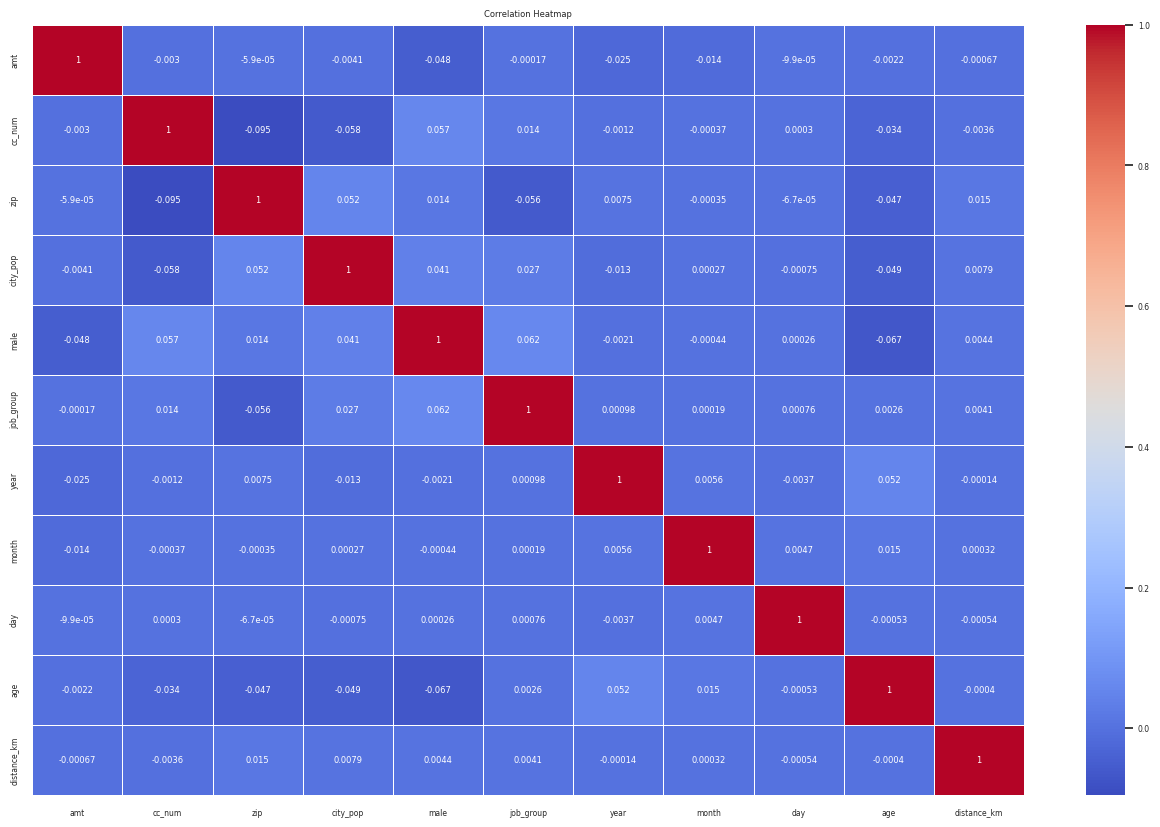

In [ ]:
plt.figure(figsize=(16, 10))

sns.set(font_scale=.5)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


### 3. Explore Target variable

In [ ]:
y = 'is_fraud'

In [ ]:
plot(df, y)

Output hidden; open in https://colab.research.google.com to view.

Observation: The targte variable indicates a very small percentage of transactions are frauds (0.13%). From 4,260,904 only 5034 transactions are fraud (1). In addition, from this analysis we can infer that the target variable is clearly imbalance as most of the transaction are part of 0 (no fraud). Therefore, the use of parameter tunning might be necessaryto assign ahigher weight to the minority class (fraud = 1).

### 4. Explore Variables of Interest

**Transaction amount**

In [ ]:
plot(df, 'amt')

Output hidden; open in https://colab.research.google.com to view.

Observation: The transcation amount is right-skewed, with most of the transaxction being small amounts.

**City population**

In [ ]:
plot(df, 'city_pop')

Output hidden; open in https://colab.research.google.com to view.

Observations: This indicates that most of the customer are living in less populated cities with a average population of 303,801.

**Gender - male**

In [ ]:
plot(df, 'male')

Output hidden; open in https://colab.research.google.com to view.

Observation: The distribution of gender is roughly equal, with number of wome being slighty higher (51%) and males (48.9%).

**Year**

In [ ]:
plot(df, 'year')

Output hidden; open in https://colab.research.google.com to view.

Observation: The year with more recorded transaction was 2022.

**Month**

In [ ]:
plot(df,'month')

Output hidden; open in https://colab.research.google.com to view.

Observation: The month with more recorded transaction is December.

**Age**

In [ ]:
plot(df, 'age')

Output hidden; open in https://colab.research.google.com to view.

Observation: The distribution show that there slightly more younger individual. The 50% of the customer ages are between 28 and 54 years, with an average of 40. It could be interesting to investigate the relation of age and fraud.

**Distance form merchant to customer**

In [ ]:
plot(df, 'distance_km')

Output hidden; open in https://colab.research.google.com to view.

Observation: The distribution show the distance between the merchant and customer are located at similar distances.

**Categoriry**

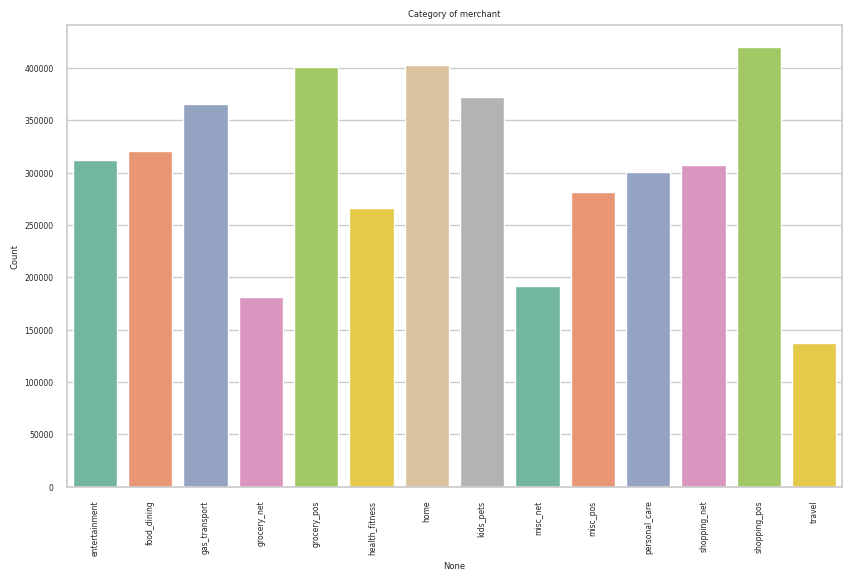

Percentage distribution Merchant Category: shopping_pos      9.863353
home              9.463649
grocery_pos       9.411148
kids_pets         8.731832
gas_transport     8.571726
food_dining       7.533354
entertainment     7.333608
shopping_net      7.205349
personal_care     7.057892
misc_pos          6.617774
health_fitness    6.242478
misc_net          4.489423
grocery_net       4.262335
travel            3.216078
Name: category, dtype: float64


In [ ]:
# Bar plot to visualize category

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=df['category'].value_counts().index,y=df['category'].value_counts().values,palette='Set2')
plt.title('Category of merchant')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
print("Percentage distribution Merchant Category: {}".format(df['category'].value_counts(normalize=True)*100))

Observation: The merchant categories are vary accros different fields  and there is not a my deffine one. However, the mos important ones are home, grocery_pos, kids_pets and gas_transport.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 17 columns):
 #   Column       Dtype   
---  ------       -----   
 0   category     category
 1   amt          float64 
 2   is_fraud     category
 3   cc_num       int64   
 4   city         category
 5   state        category
 6   zip          int32   
 7   city_pop     int32   
 8   job          category
 9   male         int64   
 10  job_group    int32   
 11  year         int64   
 12  month        int64   
 13  day          int64   
 14  time         object  
 15  age          int64   
 16  distance_km  float32 
dtypes: category(5), float32(1), float64(1), int32(3), int64(6), object(1)
memory usage: 386.1+ MB


### 4.1 The Relationship Between Response Variable and features

**Month vs fraud**

In [ ]:
month_fraud = df[df['is_fraud']==1]

In [ ]:
fraud_counts = month_fraud.groupby('month').size()

In [ ]:
fraud_counts_avg = fraud_counts.mean()

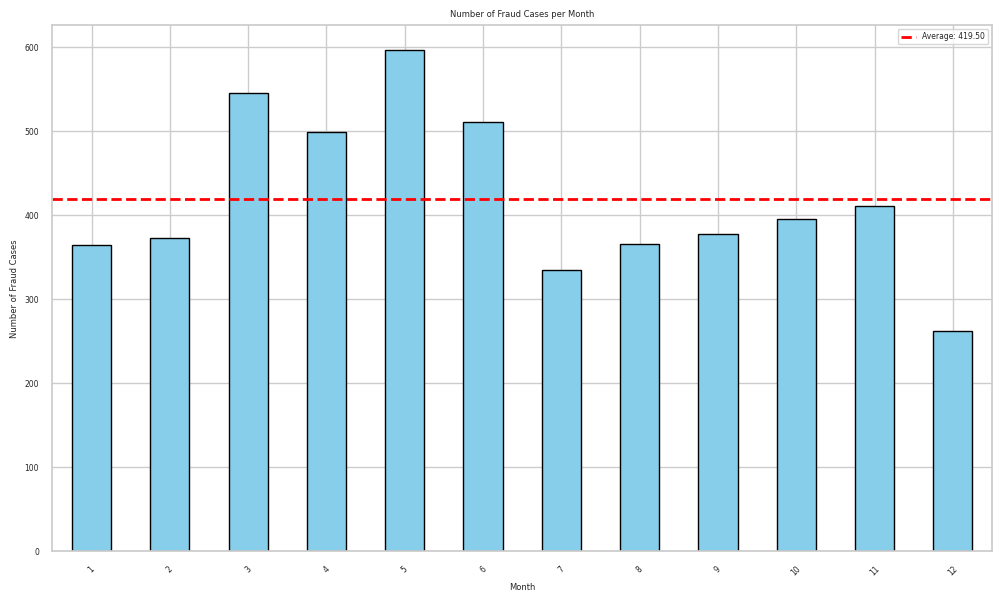

In [ ]:
plt.figure(figsize=(10, 6))
fraud_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Fraud Cases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.axhline(fraud_counts_avg, color='red', linestyle='dashed', linewidth=2, label=f'Average: {fraud_counts_avg:.2f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Observation: the average number of frauds per month is 419, and the month with higher number of frauds are march, April, may and June.

**Year vs Fraud**

In [ ]:
year_fraud = df[df['is_fraud']==1]

In [ ]:
year_faud_count = year_fraud.groupby('year').size()

In [ ]:
year_averga_fraud = year_faud_count.mean()

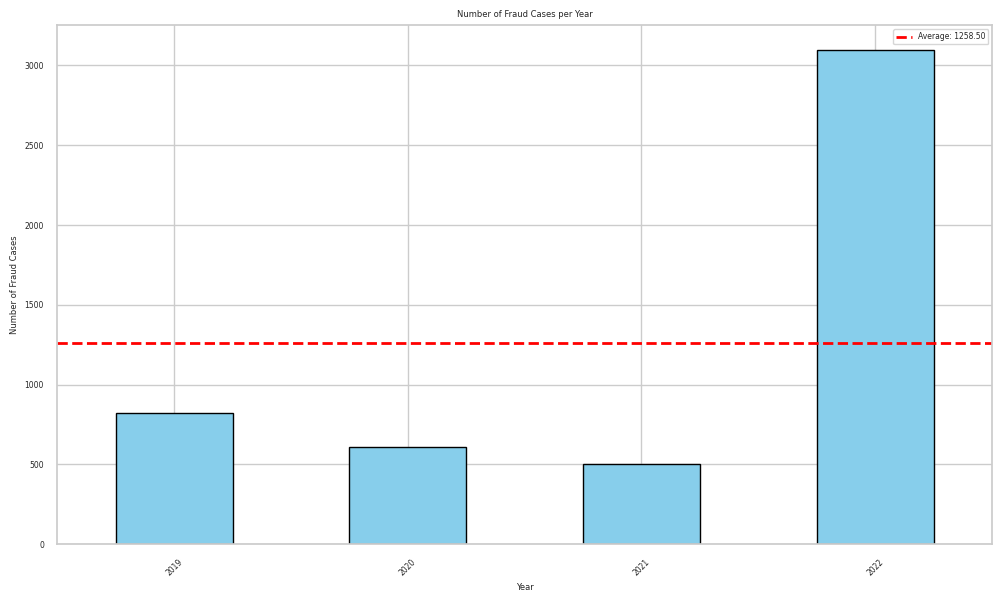

In [ ]:
plt.figure(figsize=(10, 6))
year_faud_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Fraud Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.axhline(year_averga_fraud, color='red', linestyle='dashed', linewidth=2, label=f'Average: {year_averga_fraud:.2f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Observation: The average number of credit car frouds a year is 1258 cases. We can see that 2022 is the year with the most recorded  Frauds with over 3000 cases. This information could be of great value in the feature because it clearly show a upward trends in recent year, which can be of help for financial institution to research what has made the number of fraud cases to soar.

**Day vs Fraud**

In [ ]:
day_fraud = df[df['is_fraud']==1]

In [ ]:
day_faud_count = day_fraud.groupby('day').size()

In [ ]:
day_averga_fraud = day_faud_count.mean()

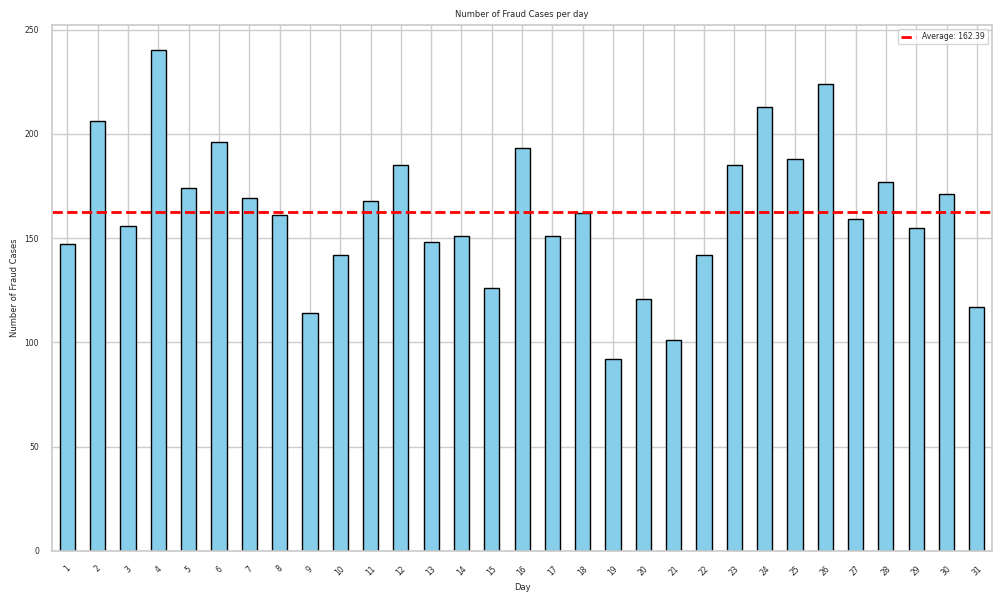

In [ ]:
plt.figure(figsize=(10, 6))
day_faud_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Fraud Cases per day')
plt.xlabel('Day')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.axhline(day_averga_fraud, color='red', linestyle='dashed', linewidth=2, label=f'Average: {day_averga_fraud:.2f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Observations: There were on average 162 cases of fraud a day. Also, after analysis we cannont see and espefict trend, the distribution is spread similarly across different days. Perhaps there is higher number of cases at the start and at the end of the month.

**Fraud vs age**

In [ ]:
age_fraud = df[df['is_fraud']==1]

In [ ]:
age_faud_count = day_fraud.groupby('age').size()

In [ ]:
age_averga_fraud = age_faud_count.mean()

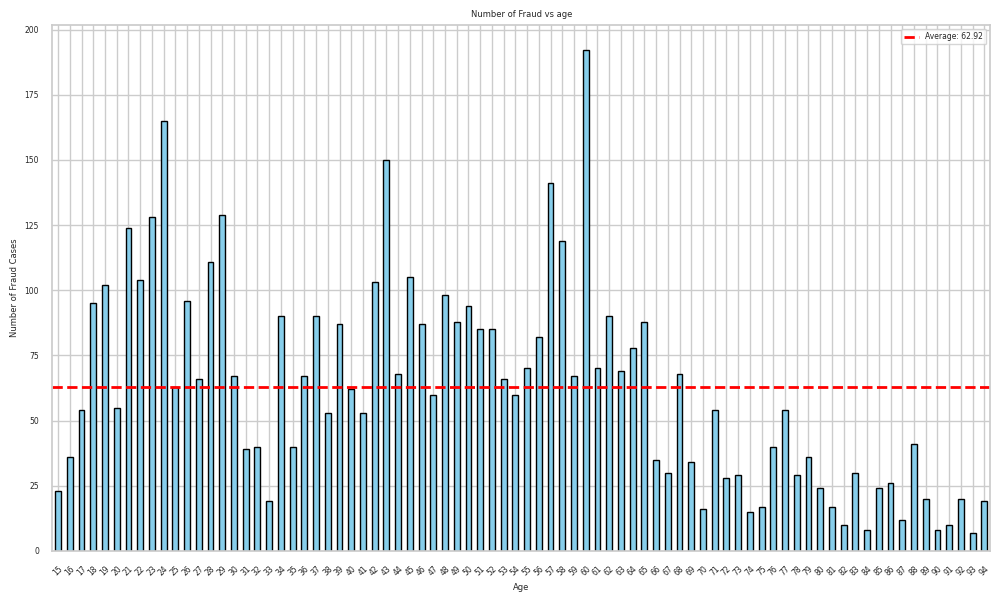

In [ ]:
plt.figure(figsize=(10, 6))
age_faud_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Fraud vs age')
plt.xlabel('Age')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)
plt.axhline(age_averga_fraud, color='red', linestyle='dashed', linewidth=2, label=f'Average: {age_averga_fraud:.2f}')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

Observations: We can see that the customer in their 20's and 40 to 60 tend to be involve in more case of fraud. In contrast those older than 60 year are less suseptible to fraud, this can be a result of a higher speding activity by young and adults.

**Analysing spending behaviour**



In [ ]:
# Aggregating total spending by month

monthly_aggregation = df.groupby(['year', 'month']).agg(
    total_spending=('amt', 'sum'),
    num_transactions=('amt', 'count'),
    avg_transaction_amt=('amt', 'mean')
).reset_index()


monthly_aggregation['date'] = pd.to_datetime(monthly_aggregation[['year', 'month']].assign(day=1))

print(monthly_aggregation.head())

   year  month  total_spending  num_transactions  avg_transaction_amt  \
0  2018     12        82236.28              1080            76.144704   
1  2019      1      3879177.79             48543            79.912197   
2  2019      2      3556840.89             45117            78.835935   
3  2019      3      5278458.89             66336            79.571558   
4  2019      4      4948199.65             62407            79.289177   

        date  
0 2018-12-01  
1 2019-01-01  
2 2019-02-01  
3 2019-03-01  
4 2019-04-01  


**Total spending**

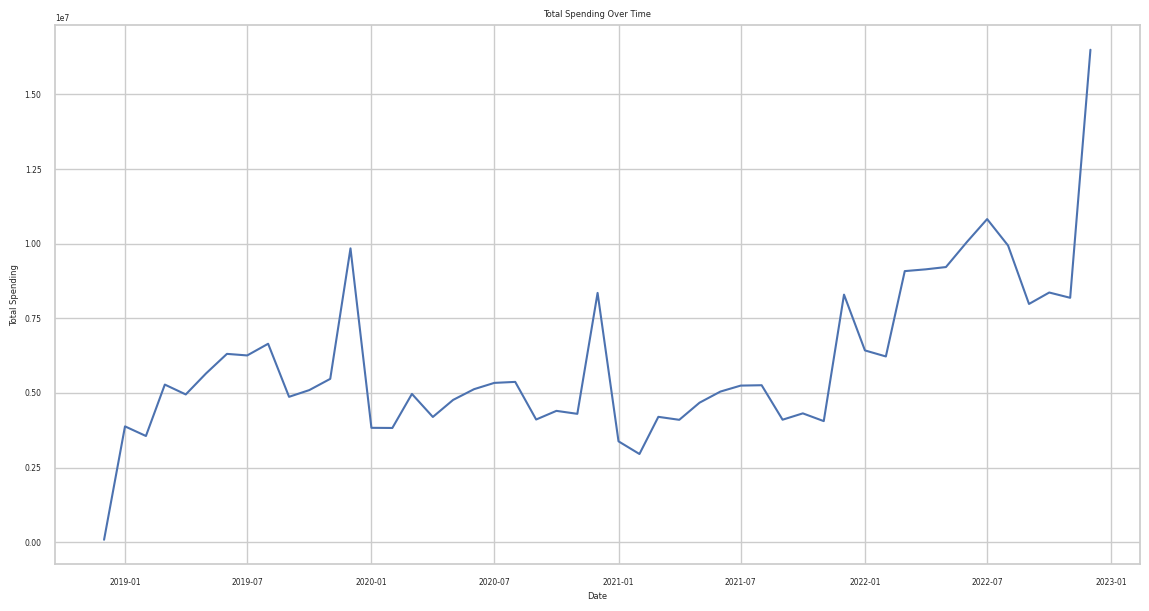

In [ ]:
plt.figure(figsize=(14, 7))

# Plot total spending over time
sns.lineplot(x='date', y='total_spending', data=monthly_aggregation)
plt.title('Total Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.show()

Observation: We can see that there is an upward trend in the total spending amount, with define peaks and troughts in spending over time, which can be linnked to seasonal event.

**Category-wise expending**

In [ ]:
# Agreggate total spending per month by category
category_aggregation = df.groupby(['year', 'month', 'category']).agg(
    total_spending=('amt', 'sum'),
    num_transactions=('amt', 'count')
).reset_index()

category_aggregation['date'] = pd.to_datetime(category_aggregation[['year', 'month']].assign(day=1))

print(category_aggregation.head())

   year  month       category  total_spending  num_transactions       date
0  2018      1  entertainment             0.0                 0 2018-01-01
1  2018      1    food_dining             0.0                 0 2018-01-01
2  2018      1  gas_transport             0.0                 0 2018-01-01
3  2018      1    grocery_net             0.0                 0 2018-01-01
4  2018      1    grocery_pos             0.0                 0 2018-01-01


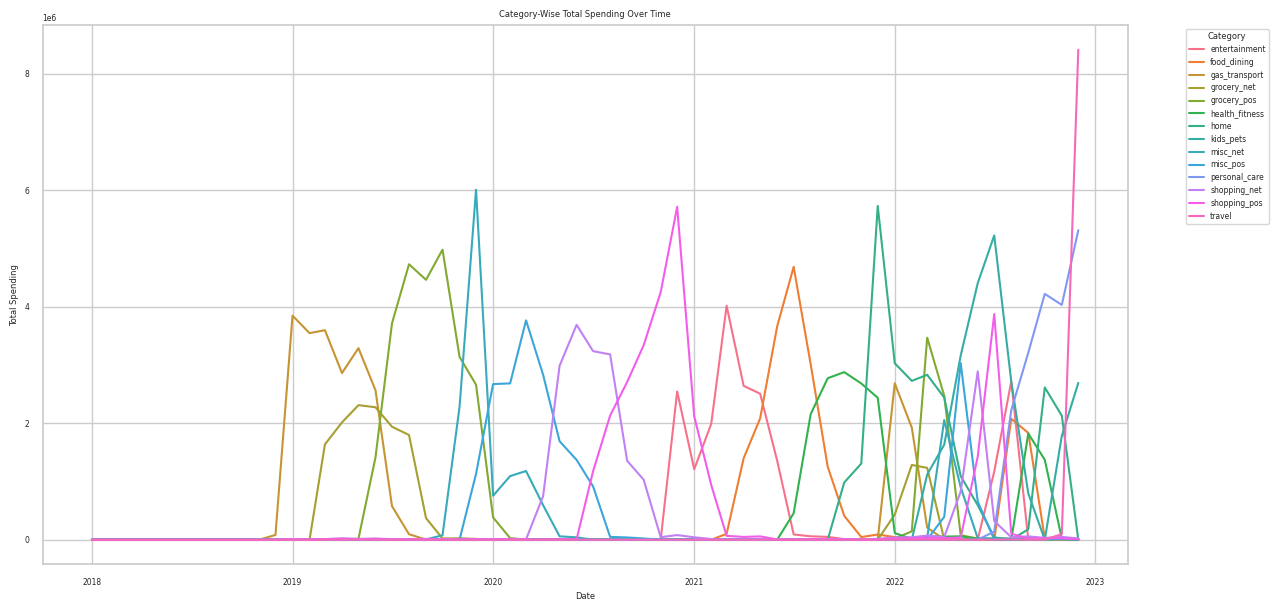

In [ ]:
plt.figure(figsize=(14, 7))

# Plot total spending over time for each category
sns.lineplot(x='date', y='total_spending', hue='category', data=category_aggregation)
plt.title('Category-Wise Total Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Total Spending')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Spending by age**

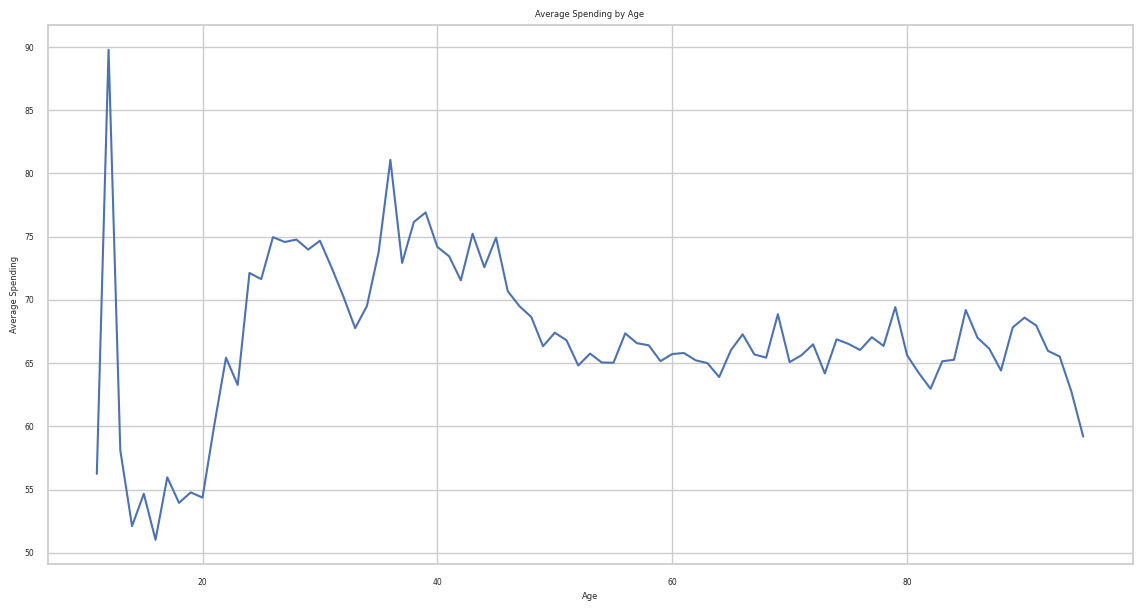

In [ ]:
age_group_spending = df.groupby('age')['amt'].mean().reset_index()
plt.figure(figsize=(14, 7))
sns.lineplot(x='age', y='amt', data=age_group_spending)
plt.title('Average Spending by Age')
plt.xlabel('Age')
plt.ylabel('Average Spending')
plt.show()

Observation: The average spending by age is usually lower in the early ages (with the exception of one cases that inflates values - potentially and outlier). Then after the 20's the average spending start to increase until around th 40's, where it starts to degrease again.

In [ ]:
age_under_20 = df.query('age<= 20')

In [ ]:
max_spending_under_20 = age_under_20['amt'].max()
print(f"Maximum spending for age below 20: {max_spending_under_20}")

Maximum spending for age below 20: 41300.53


In [ ]:
max_atm = df.query('amt==41300.53')

In [ ]:
max_atm

,category,amt,is_fraud,cc_num,city,state,zip,city_pop,job,male,job_group,year,month,day,time,age,distance_km
3164090,shopping_net,41300.53,0,4823134275576720,Deland,FL,32724,61526,Volunteer coordinator,0,8,2020,6,19,12:25:45,12,119.990044


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 17 columns):
 #   Column       Dtype   
---  ------       -----   
 0   category     category
 1   amt          float64 
 2   is_fraud     category
 3   cc_num       int64   
 4   city         category
 5   state        category
 6   zip          int32   
 7   city_pop     int32   
 8   job          category
 9   male         int64   
 10  job_group    int32   
 11  year         int64   
 12  month        int64   
 13  day          int64   
 14  time         object  
 15  age          int64   
 16  distance_km  float32 
dtypes: category(5), float32(1), float64(1), int32(3), int64(6), object(1)
memory usage: 386.1+ MB


### 5. Prepare Data

In [ ]:
df_final = df.copy()

In [ ]:
print(df_final.columns)
print(df_final[['year', 'month', 'day']].head())

Index(['category', 'amt', 'is_fraud', 'cc_num', 'city', 'state', 'zip',
       'city_pop', 'job', 'male', 'job_group', 'year', 'month', 'day', 'time',
       'age', 'distance_km'],
      dtype='object')
   year  month  day
0  2019      5   24
1  2019      9   25
2  2019     12   24
3  2019     10   18
4  2019      2   10


In [ ]:
!pip install dask

In [ ]:
import dask.dataframe as dd

In [ ]:
ddf = dd.from_pandas(df_final, npartitions=10)

In [ ]:
print(ddf.columns)

Index(['category', 'amt', 'is_fraud', 'cc_num', 'city', 'state', 'zip',
       'city_pop', 'job', 'male', 'job_group', 'year', 'month', 'day', 'time',
       'age', 'distance_km'],
      dtype='object')


**Creating a new feature - Daily spending**

This feature captures the short-term fluctuation and unusual activities, which is often more effective in anomaly detection.


In [ ]:
daily_spending = ddf.groupby(['cc_num', 'year', 'month','day']). agg(
    total_daily_spending = ('amt', 'sum')
).reset_index()

In [ ]:
ddf = ddf.merge(daily_spending, on=['cc_num', 'year', 'month', 'day'], how='left')

**Cretating a new feature -  Spending Ratio by Category**

This feature would provide insights into how speding is distributed across different categories. Changes in the spending ratio can highlight unusual behaviour in specific spending categories.

In [ ]:
#category_daily_spending = ddf.groupby(['cc_num', 'year', 'month', 'day', 'category']).agg(
#    category_daily_spending=('amt', 'sum')
#).reset_index()

In [ ]:
#ddf = ddf.merge(category_daily_spending, on=['cc_num', 'year', 'month', 'day', 'category'], how='left')

In [ ]:
#ddf['daily_spending_ratio'] = ddf['category_daily_spending'] / ddf['total_daily_spending']

In [ ]:
#ddf = ddf.drop(columns=['category_daily_spending'])

In [ ]:
df_final = ddf.compute()

**Transforming and remapping is_fraud**



*   0 would become 1 (no fraud)
*   1 would become -1 (fraud)




This to facilitate the analysis after the models result

In [ ]:
# convert to float type
df_final['is_fraud'] = df_final['is_fraud'].astype(float)

In [ ]:
df_final['is_fraud'].unique()

array([0., 1.])

In [ ]:
df_final['is_fraud'] = df_final['is_fraud'].map({0:1, 1:-1})

**Group Age into Categories**

In [ ]:
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 60:
        return 'Middle-age'
    else:
        return 'Senior'

In [ ]:
df_final['age_category'] = df_final['age'].apply(categorize_age)

In [ ]:
df_final.drop(columns=['age'], inplace=True)

**Extra temporal features from month, day, time**

*   Quarter
*   Hour - Usually frauds occurs at unusual hours.






In [ ]:
df_final['date'] = pd.to_datetime(df_final[['year', 'month', 'day']])

In [ ]:
#extract quarter
df_final['quarter'] = df_final['date'].dt.quarter

In [ ]:
df_final.drop(columns=['year', 'month', 'day', 'date'], inplace=True)

In [ ]:
# Extract hour
df_final['time'] = pd.to_datetime(df_final['time'], format='%H:%M:%S').dt.time

In [ ]:
df_final['hour'] = pd.to_datetime(df_final['time'], format='%H:%M:%S').dt.hour

In [ ]:
df_final.drop(columns=['time'], inplace=True)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 426089
Data columns (total 16 columns):
 #   Column                Dtype   
---  ------                -----   
 0   category              category
 1   amt                   float64 
 2   is_fraud              int64   
 3   cc_num                int64   
 4   city                  category
 5   state                 category
 6   zip                   int32   
 7   city_pop              int32   
 8   job                   category
 9   male                  int64   
 10  job_group             int32   
 11  distance_km           float32 
 12  total_daily_spending  float64 
 13  age_category          object  
 14  quarter               int64   
 15  hour                  int64   
dtypes: category(4), float32(1), float64(2), int32(3), int64(5), object(1)
memory usage: 382.0+ MB


**Drop features that won't be use in the model**

In [ ]:
df_cleaned = df_final.drop(columns=['job','cc_num','zip','city', 'state'])

**One-hot encoding and feature scaling**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
col_encode = ['category', 'age_category']

In [ ]:
df_encoded = pd.get_dummies(df_cleaned, columns=col_encode, drop_first=True)

**Scaling variables**

In [ ]:
columns_to_scale = df_encoded.columns.difference(['is_fraud'])

In [ ]:
scaler = StandardScaler()

In [ ]:
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

In [ ]:
df_encoded.sample(5)

,amt,is_fraud,city_pop,male,job_group,distance_km,total_daily_spending,quarter,hour,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,age_category_Senior,age_category_Young
393268,-0.067396,1,-0.197859,-0.978892,-1.629903,-0.615544,2.065368,1.199025,0.072643,-0.285431,-0.306192,-0.211,-0.322318,-0.258033,-0.323309,3.233009,-0.216805,-0.26621,-0.27557,-0.278654,-0.330797,-0.18229,-0.476207,-0.617826
100848,-0.368855,1,-0.516463,1.021563,0.700325,-0.567958,-0.498065,1.199025,-0.990696,-0.285431,-0.306192,-0.211,-0.322318,3.875471,-0.323309,-0.309309,-0.216805,-0.26621,-0.27557,-0.278654,-0.330797,-0.18229,-0.476207,1.618580
31763,0.072551,1,0.901492,1.021563,1.033215,-1.096925,-0.518362,-1.548144,1.287888,-0.285431,3.265924,-0.211,-0.322318,-0.258033,-0.323309,-0.309309,-0.216805,-0.26621,-0.27557,-0.278654,-0.330797,-0.18229,-0.476207,1.618580
332995,-0.373859,1,0.376789,-0.978892,-1.297013,0.255294,0.387215,1.199025,-0.383074,-0.285431,-0.306192,-0.211,-0.322318,3.875471,-0.323309,-0.309309,-0.216805,-0.26621,-0.27557,-0.278654,-0.330797,-0.18229,-0.476207,1.618580
312008,0.117964,1,-0.332460,-0.978892,-0.964123,-1.654425,0.436974,0.283302,-0.231168,-0.285431,-0.306192,-0.211,-0.322318,3.875471,-0.323309,-0.309309,-0.216805,-0.26621,-0.27557,-0.278654,-0.330797,-0.18229,-0.476207,-0.617826


**Save preprocessed data**

In [ ]:
df_encoded.to_csv('preprocessed_dataset3.csv', index=False)

print("Preprocessing completed and data saved.")

Preprocessing completed and data saved.


#**Part 2: Modelling.  Will continue on next notebook due to memory constrains**